In [36]:
import nltk
import zipfile
from zipfile import ZipFile
import pandas as pd
import string

In [3]:
# nltk.download_shell()

In [13]:
ZipFile('smsspamcollection.zip').extractall()

In [14]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [15]:
messages[8]

'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [19]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [22]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
messages['length'] = messages['message'].apply(len)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import matplotlib.pyplot as plt
import seaborn  as sns

In [27]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

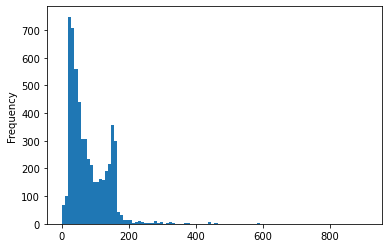

In [31]:
messages['length'].plot.hist(bins=100)

<AxesSubplot:xlabel='length', ylabel='Count'>

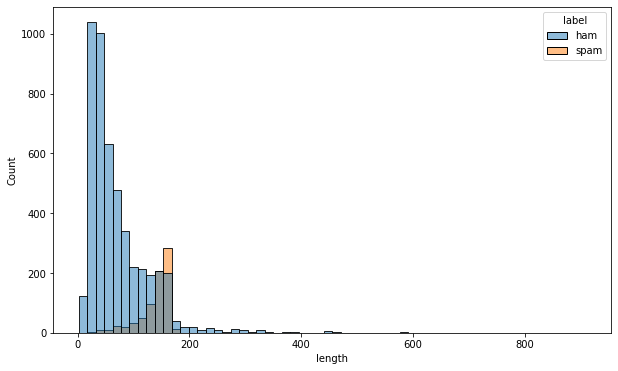

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=messages, x='length', hue='label', bins=60, )

In [53]:
def process_text(message):
    '''
    remove punctation marks using string module
    remove stop words using nltk library
    return list of clean text words
    '''
    no_punc = [c for c in message if c not in string.punctuation]
    no_punc = ''.join(no_punc)
    bow = [word for word in no_punc.split() if word.lower() not in nltk.corpus.stopwords.words('english')]
    return bow
    

In [54]:
process_text('My name is raja! i do not have any gf? do i>')

['name', 'raja', 'gf']

In [56]:
messages['message'][:5].apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
bow_transformer = CountVectorizer(analyzer=process_text).fit_transform(messages['message'])

In [59]:
len(bow_transformer.vocabulary_)

11425

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
tfidf_transformer = TfidfTransformer().fit_transform(bow_transformer)

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
spam_detector_model = MultinomialNB().fit(bow_transformer, messages['label'])

In [69]:
spam_detector_model.predict(bow_transformer)

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Pipeline to pre-process the data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [72]:
from sklearn.pipeline import Pipeline

In [74]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [75]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x000002D566B6FE50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [78]:
predictions = pipeline.predict(x_test)

In [77]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

